## Section 3 - Language Identification with Naive Bayes

In [1]:
import math
import numpy as np
import pandas as pd
import string
import random
from collections import Counter
pd.set_option('display.max_rows', 10000) 
pd.set_option('display.max_columns', 10000)

### Naive Bayes Classifier

In [2]:
class NaiveBayesClassifier():
    def __init__(self):
        self.prior_pr_dict = dict()
        self.conditional_pr_dict = dict()
        self.log_pred_conditional_pr_dict = dict()
        self.log_pred_posterior_pr_dict = dict()
        self.acceptable_chars = []
        self.languages = []

    def train(self, data, characters, languages, alpha, K_L, K_S):

        self.languages = languages
        self.acceptable_chars = characters

        for lang in languages:
            total = 0
            for i in range(0,len(data)):
                if data[i]['y'] == lang:
                    total += 1
            self.prior_pr_dict[lang] = (total+alpha)/(len(data)+(K_L*alpha))

        for lang in languages:
            char_dict = dict()
            for char in characters:
                num_sum = 0
                denom_sum = 0
                for i in range(0,len(data)):
                    if data[i]['y'] == lang:
                        denom_sum += data[i]['numchars']
                        for j in range(0,data[i]['numchars']):
                            if data[i]['x'][j] == char:
                                num_sum += 1
                char_dict[char] = (num_sum+alpha)/(denom_sum+(K_S*alpha))
            self.conditional_pr_dict[lang] = char_dict

    def pred(self, sample):        
        for lang in self.languages:
            log_pred_conditional_pr = 0
            for char in self.acceptable_chars:
                log_pred_conditional_pr += (sample[char]*math.log(self.conditional_pr_dict[lang][char]))
            self.log_pred_conditional_pr_dict[lang] = log_pred_conditional_pr

        for lang in self.languages:
            self.log_pred_posterior_pr_dict[lang] = self.log_pred_conditional_pr_dict[lang] + math.log(self.prior_pr_dict[lang])
        
        return max(self.log_pred_posterior_pr_dict, key=self.log_pred_posterior_pr_dict.get)

    def get_prior_pr_dict(self):
        return self.prior_pr_dict

    def get_conditional_pr_dict(self):
        return self.conditional_pr_dict

    def get_log_pred_conditional_pr_dict(self):
        return self.log_pred_conditional_pr_dict

    def get_log_pred_posterior_pr_dict(self):
        return self.log_pred_posterior_pr_dict

### Problem 1

In [3]:
def bagofchars(file_list=[]):
    acceptable_chars = list(string.ascii_lowercase)
    acceptable_chars.extend(" ")
    data = []
    
    for i in range(0,len(file_list)):
        char_list =[]
        with open('Data/'+file_list[i]+'.txt', 'r') as file:
            file_contents = file.read()
            char_list = list(file_contents)
        data.append(dict())
        data[i]['x'] = [char for char in char_list if char in acceptable_chars]
        data[i]['y'] = file_list[i][0]
        data[i]['numchars'] = len(data[i]['x'])
    return data

In [4]:
train_file_list = ['e0','e1','e2','e3','e4','e5','e6','e7','e8','e9',
                      's0','s1','s2','s3','s4','s5','s6','s7','s8','s9',
                      'j0','j1','j2','j3','j4','j5','j6','j7','j8','j9']
train_data = bagofchars(train_file_list)

In [5]:
characters = list(string.ascii_lowercase)
characters.extend(" ")
languages = ['e','s','j']

In [6]:
model = NaiveBayesClassifier()
model.train(train_data, characters, languages, alpha=.5, K_L=3, K_S=27)

In [7]:
print("p_hat(y=language):", model.get_prior_pr_dict())

p_hat(y=language): {'e': 0.3333333333333333, 's': 0.3333333333333333, 'j': 0.3333333333333333}


### Problem 2

In [8]:
print("θ_e:")
model.get_conditional_pr_dict()['e']

θ_e:


{'a': 0.0601685114819098,
 'b': 0.011134974392863043,
 'c': 0.021509995043779945,
 'd': 0.021972575582355856,
 'e': 0.1053692383941847,
 'f': 0.018932760614571286,
 'g': 0.017478936064761277,
 'h': 0.047216256401784236,
 'i': 0.055410540227986124,
 'j': 0.001420783082768875,
 'k': 0.0037336857756484387,
 'l': 0.028977366595076822,
 'm': 0.020518751032545846,
 'n': 0.057921691723112505,
 'o': 0.06446390219725756,
 'p': 0.01675202378985627,
 'q': 0.0005617049396993227,
 'r': 0.053824549810011564,
 's': 0.06618205848339666,
 't': 0.08012555757475633,
 'u': 0.026664463902197257,
 'v': 0.009284652238559392,
 'w': 0.015496448042293078,
 'x': 0.001156451346439782,
 'y': 0.013844374690236246,
 'z': 0.0006277878737815959,
 ' ': 0.1792499586981662}

### Problem 3

In [9]:
print("θ_j:")
torch_model.get_conditional_pr_dict()['j']

θ_j:


{'a': 0.1317656102589189,
 'b': 0.010866906600510151,
 'c': 0.005485866033054963,
 'd': 0.01722631818022992,
 'e': 0.06020475907613823,
 'f': 0.003878542227191726,
 'g': 0.014011670568503443,
 'h': 0.03176211607673224,
 'i': 0.09703343932352633,
 'j': 0.0023411020650616725,
 'k': 0.05740941332681086,
 'l': 0.001432614696530277,
 'm': 0.03979873510604843,
 'n': 0.05671057688947902,
 'o': 0.09116321324993885,
 'p': 0.0008735455466648031,
 'q': 0.00010482546559977637,
 'r': 0.04280373178657535,
 's': 0.0421747789929767,
 't': 0.056990111464411755,
 'u': 0.07061742199238269,
 'v': 0.0002445927530661449,
 'w': 0.01974212935462455,
 'x': 3.4941821866592126e-05,
 'y': 0.01415143785596981,
 'z': 0.00772214263251686,
 ' ': 0.12344945665466997}

In [10]:
print("θ_s:")
model.get_conditional_pr_dict()['s']

θ_s:


{'a': 0.10456045141993771,
 'b': 0.008232863618143134,
 'c': 0.03752582405722919,
 'd': 0.039745922111559924,
 'e': 0.1138108599796491,
 'f': 0.00860287996053159,
 'g': 0.0071844839813758445,
 'h': 0.0045327001942585795,
 'i': 0.049859702136844375,
 'j': 0.006629459467793161,
 'k': 0.0002775122567913416,
 'l': 0.052943171656748174,
 'm': 0.02580863988159477,
 'n': 0.054176559464709693,
 'o': 0.07249236841293824,
 'p': 0.02426690512164287,
 'q': 0.007677839104560451,
 'r': 0.05929511886774999,
 's': 0.06577040485954797,
 't': 0.03561407295488884,
 'u': 0.03370232185254849,
 'v': 0.00588942678301625,
 'w': 9.250408559711388e-05,
 'x': 0.0024976103111220747,
 'y': 0.007862847275754679,
 'z': 0.0026826184823163022,
 ' ': 0.16826493170115014}

### Problem 4

In [11]:
def bagOfCharsCount(file):
    accepted_chars = list(string.ascii_lowercase)
    accepted_chars.extend(" ")
    bag_of_char_count = dict()
    
    char_list =[]
    with open('Data/'+file+'.txt', 'r') as file:
        file_contents = file.read()
        char_list = list(file_contents)
    num_chars = Counter(char_list)
    for char in accepted_chars:
        bag_of_char_count[char] = num_chars[char]
    
    return bag_of_char_count

In [12]:
e10_bagOfCharsCount = bagOfCharsCount('e10')
e10_bagOfCharsCount

{'a': 164,
 'b': 32,
 'c': 53,
 'd': 57,
 'e': 311,
 'f': 55,
 'g': 51,
 'h': 140,
 'i': 140,
 'j': 3,
 'k': 6,
 'l': 85,
 'm': 64,
 'n': 139,
 'o': 182,
 'p': 53,
 'q': 3,
 'r': 141,
 's': 186,
 't': 225,
 'u': 65,
 'v': 31,
 'w': 47,
 'x': 4,
 'y': 38,
 'z': 2,
 ' ': 498}

### Problem 5

In [13]:
print("Predicted Conditional Probabilities of x:")
model.pred(e10_bagOfCharsCount)
model.get_log_pred_conditional_pr_dict()

Predicted Conditional Probabilities of x:


{'e': -7841.865447060635, 's': -8467.282044010557, 'j': -8771.433079075032}

### Problem 6

In [14]:
print("Predicted Posterior Probabilites of x:")
model.get_log_pred_posterior_pr_dict()

Predicted Posterior Probabilites of x:


{'e': -7842.964059349303, 's': -8468.380656299225, 'j': -8772.5316913637}

In [15]:
print('Predicted Class Label of x:', model.pred(e10_bagOfCharsCount))

Predicted Class Label of x: e


### Problem 7

In [16]:
test_file_list = ['e10','e11','e12','e13','e14','e15','e16','e17','e18','e19',
                  's10','s11','s12','s13','s14','s15','s16','s17','s18','s19',
                  'j10','j11','j12','j13','j14','j15','j16','j17','j18','j19']

for file in test_file_list:
    bagOfCharactersCount = bagOfCharsCount(file)
    print("Prediction for ", file,": ", model.pred(bagOfCharactersCount),sep="")

Prediction for e10: e
Prediction for e11: e
Prediction for e12: e
Prediction for e13: e
Prediction for e14: e
Prediction for e15: e
Prediction for e16: e
Prediction for e17: e
Prediction for e18: e
Prediction for e19: e
Prediction for s10: s
Prediction for s11: s
Prediction for s12: s
Prediction for s13: s
Prediction for s14: s
Prediction for s15: s
Prediction for s16: s
Prediction for s17: s
Prediction for s18: s
Prediction for s19: s
Prediction for j10: j
Prediction for j11: j
Prediction for j12: j
Prediction for j13: j
Prediction for j14: j
Prediction for j15: j
Prediction for j16: j
Prediction for j17: j
Prediction for j18: j
Prediction for j19: j


### Problem 8

In [17]:
def shuffle_text(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    shuffled_lines = []
    for line in lines:
        # Split each line into printable characters and non-printable characters
        printable_chars = [char for char in line if char.isprintable()]
        non_printable_chars = [char for char in line if not char.isprintable()]

        # Shuffle only the printable characters
        random.shuffle(printable_chars)

        # Reconstruct the line with the shuffled printable characters and original non-printable characters
        shuffled_line = ''.join(printable_chars) + ''.join(non_printable_chars)
        shuffled_lines.append(shuffled_line)

    # Write the shuffled text to a new file
    shuffled_file_path = file_path.replace('.txt', '_shuffled.txt')
    with open(shuffled_file_path, 'w') as shuffled_file:
        shuffled_file.write(''.join(shuffled_lines))

    return shuffled_file_path

# Replace 'your_file.txt' with the path to your text file
original_file_path = 'Data/j15.txt'
shuffled_file_path = shuffle_text(original_file_path)
print(f'Shuffled text file created: {shuffled_file_path}')

Shuffled text file created: Data/j15_shuffled.txt


In [18]:
j15_shuffled_bagOfCharactersCount = bagOfCharsCount('j15_shuffled')
j15_bagOfCharactersCount = bagOfCharsCount('j15')
entered = False
for char in list(j15_bagOfCharactersCount.keys()):
    if j15_shuffled_bagOfCharactersCount[char] != j15_bagOfCharactersCount[char]:
        print("ERROR: character counts between shuffled and not shuffled files don't match.")
        entered = True
if entered==False:
    print("File character counts match!")

File character counts match!


In [19]:
print("Prediction for j15: ", model.pred(j15_bagOfCharactersCount),sep="")
print("Prediction for j15_shuffled: ", model.pred(j15_shuffled_bagOfCharactersCount),sep="")

Prediction for j15: j
Prediction for j15_shuffled: j


In [20]:
model.pred(j15_bagOfCharactersCount)
print("Predicted Posterior Probabilites of j15:")
model.get_log_pred_posterior_pr_dict()

Predicted Posterior Probabilites of j15:


{'e': -3855.3547243138123, 's': -4211.1837184925525, 'j': -3539.5781224678676}

In [21]:
model.pred(j15_shuffled_bagOfCharactersCount)
print("Predicted Posterior Probabilites of j15_shuffled:")
model.get_log_pred_posterior_pr_dict()

Predicted Posterior Probabilites of j15_shuffled:


{'e': -3855.3547243138123, 's': -4211.1837184925525, 'j': -3539.5781224678676}

## Section 4 - Simple Feed-Forward Network

### Problem 2 - Custom Network

In [22]:
pip install torch torchvision

Note: you may need to restart the kernel to use updated packages.


In [23]:
import numpy as np
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [27]:
class CustomNN():
    def __init__(self, lr = 0.03, k = 10, d = 784, d1 = 300):
        self.lr = lr
        self.n_y = k
        self.n_X = d
        self.n_h = d1
        self.init_weights()

    def init_weights(self, method = 'range'):
        self.W1 = np.random.uniform(-1, 1, (self.n_h, self.n_X))
        self.W2 = np.random.uniform(-1, 1, (self.n_y, self.n_h))

    def sigmoid(self, value):
        return 1 / (1 + np.exp(-value))
    
    def delta_sigmoid(self, value):
        return self.sigmoid(value) * (1 - self.sigmoid(value))
    
    def loss_func(self, y_pred, y_label):
        return -np.sum(np.multiply(y_label, np.log(y_pred)))

    def train(self, X_train, y_train):
        batch_cost = 0
        for X, y in zip(X_train, y_train.T):
            self.X = np.reshape(X, (1, self.n_X))
            self.y = np.reshape(y, (self.n_y, 1))
            self.m = self.X.shape[0]
            
            z1 = np.matmul(self.W1, self.X.T)
            activation = self.sigmoid(z1)
            z2 = np.matmul(self.W2, activation)
            func = np.exp(z2) / np.sum(np.exp(z2), axis=0)

            batch_cost += self.loss_func(func, self.y)

            z2_d = func - self.y
            W2_d = (1/self.m) * np.matmul(z2_d, activation.T)

            self.W2 = self.W2 - self.lr * W2_d

            activation_d = np.matmul(self.W2.T, z2_d)
            z1_d = activation_d * self.delta_sigmoid(z1)
            W1_d = (1./self.m) * np.matmul(z1_d, self.X)

            self.W1 = self.W1 - self.lr * W1_d
        return batch_cost
    
    def predict(self, X_test):
        h1 = self.sigmoid(np.matmul(self.W1, X_test.T))
        z2 = np.matmul(self.W2, h1)
        g = np.exp(z2) / np.sum(np.exp(z2), axis=0)
        return np.argmax(g, axis=0)
    
    def test_error(self, X_test, y_test):
        y_pred = self.predict(X_test)
        correct = np.count_nonzero(y_pred == y_test)
        return 1 - correct/len(y_test)

Epoch 0, Step 1, Cost = 262.60829882505936
Epoch 0, Step 100, Cost = 26.534166975952346
Epoch 0, Step 200, Cost = 13.173385712860318
Epoch 0, Step 300, Cost = 11.988756442919911
Epoch 0, Step 400, Cost = 10.71209554711059
Epoch 0, Step 500, Cost = 21.044437207217133
Epoch 0, Step 600, Cost = 5.312362495494812
Epoch 0, Step 700, Cost = 12.370556394621115
Epoch 0, Step 800, Cost = 17.513297724189695
Epoch 0, Step 900, Cost = 31.9177050113891
Epoch 0, Step 1000, Cost = 9.961321519349845
Epoch 0, Step 1100, Cost = 29.77203705258521
Epoch 0, Step 1200, Cost = 29.617188179477477
Epoch 0, Step 1300, Cost = 28.354735375470742
Epoch 0, Step 1400, Cost = 13.083866341090578
Epoch 0, Step 1500, Cost = 12.705706979741677
Epoch 0, Step 1600, Cost = 12.011982555551857
Epoch 0, Step 1700, Cost = 19.665747870334698
Epoch 0, Step 1800, Cost = 4.255089777700337
Epoch 1, Step 25, Cost = 0.5779310330638759
Epoch 1, Step 125, Cost = 3.445266431442266
Epoch 1, Step 225, Cost = 21.24900395191293
Epoch 1, Step

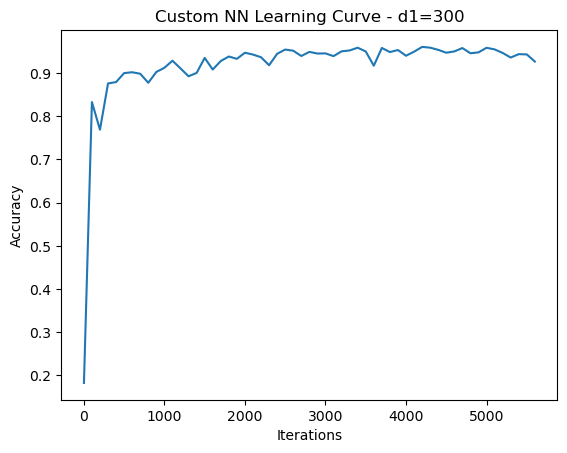

In [34]:
def NNClassifier():
    train_batch_size = 32
    train_loader = torch.utils.data.DataLoader(torchvision.datasets.MNIST(root='./Data', train=True, download=True, transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(), torch.flatten])), batch_size=train_batch_size, shuffle=True)
    test_loader = torch.utils.data.DataLoader(torchvision.datasets.MNIST(root='./Data', train=False, download=True, transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(), torch.flatten])), batch_size=10000, shuffle=True)

    epochs = 3
    custon_model = CustomNN()
    learning_curve = {}
    iterations = 1

    for i in range(epochs):
        for step, (X_train, y_train) in enumerate(train_loader):
            y_train = y_train.reshape(1, y_train.shape[0])
            y_train = np.eye(10)[y_train].T.reshape(10, y_train.shape[1])

            cost = custon_model.train(np.array(X_train), np.array(y_train))

            if iterations%100 == 0 or iterations == 1: 
                print(f'Epoch {i}, Step {step+1}, Cost = {cost}')
                for idx, (X_test, y_test) in enumerate(test_loader):
                    learning_curve[iterations] = 1 - custon_model.test_error(np.array(X_test), np.array(y_test))
            iterations += 1

    accuracy = []
    for idx, (X_test, y_test) in enumerate(test_loader):
        accuracy.append(1 - custon_model.test_error(np.array(X_test), np.array(y_test)))

    print(np.mean(accuracy))

    plt.plot(learning_curve.keys(), learning_curve.values())
    plt.xlabel("Iterations")
    plt.ylabel("Accuracy")
    plt.title("Custom NN Learning Curve - d1=300")
    plt.savefig('4.2-300.png')

NNClassifier()

### Problem 3 (No Weight Initialization) & Problem 4 (Zero Weights and Uniform Weights)

Epoch -1, Test Error = 0.857
Epoch 0, Test Error = 0.05269999999999997
Epoch 1, Test Error = 0.04200000000000004
Epoch 2, Test Error = 0.03749999999999998
Epoch 3, Test Error = 0.037699999999999956
Epoch 4, Test Error = 0.035699999999999954
Epoch 5, Test Error = 0.03169999999999995
Epoch 6, Test Error = 0.03369999999999995
Epoch 7, Test Error = 0.02629999999999999
Epoch 8, Test Error = 0.02639999999999998
Epoch 9, Test Error = 0.02639999999999998


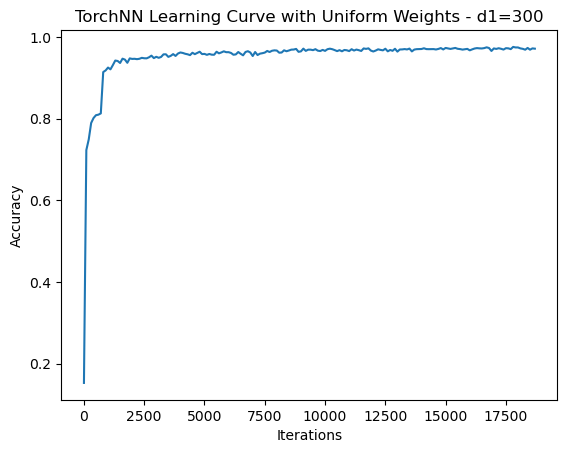

In [33]:
class TorchNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(784, 300, bias=False),
            nn.Sigmoid(),
            nn.Linear(300, 10, bias=False),
            nn.Softmax(dim=1)
        )
        self.init_weights()
    
    def init_weights(self):
        for name, param in self.named_parameters():
            nn.init.uniform_(param, -1, 1) #Uniform Weights
            # nn.init.zeros_(param) #Zero Weights

    def forward(self, x):
        return self.layers(x)
    
train_batch_size = 32
train_loader = torch.utils.data.DataLoader(torchvision.datasets.MNIST(root='./Data', train=True, download=True, transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(), torch.flatten])), batch_size=train_batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(torchvision.datasets.MNIST(root='./Data', train=False, download=True, transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(), torch.flatten])), batch_size=10000, shuffle=True)

def test_error(dataloader, torch_model):
    size = len(dataloader.dataset)
    correct = 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = torch_model(X)
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    correct /= size
    return 1 - correct

torch_model = TorchNN()
loss_func = nn.CrossEntropyLoss()
optimizer = optim.AdamW(torch_model.parameters(), lr=0.005)

iterations = 1
epochs = 10
learning_curve = {}

print(f'Epoch {-1}, Test Error = {test_error(test_loader, torch_model)}')
for i in range(epochs):
    size = len(train_loader.dataset)
    for batch, (X, y) in enumerate(train_loader):
        pred = torch_model(X)
        loss = loss_func(pred, y)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
        
        if iterations%100 == 0 or iterations == 1:
            learning_curve[iterations] = 1 - test_error(test_loader, torch_model)
        iterations += 1
    print(f'Epoch {i}, Test Error = {test_error(test_loader, torch_model)}')

plt.plot(learning_curve.keys(), learning_curve.values())
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.title("TorchNN Learning Curve with Uniform Weights - d1=300")
plt.savefig('4.4-300-UniformWeight.png')